<a href="https://colab.research.google.com/github/lippebarroso/challengetelecomfinal/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [20]:
import json
import pandas as pd

In [22]:
with open('/TelecomX_Data (1).json', 'r') as file:
    data = json.load(file)

#🔧 Transformação

In [32]:
df = pd.json_normalize(data)

In [35]:
print(df.isnull().sum())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [36]:
print("Duplicados:", df.duplicated().sum())

Duplicados: 0


In [37]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account.Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '37

In [38]:
df = df[df['Churn'].isin(['Yes', 'No'])]

In [43]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [44]:
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(df['account.Charges.Total'].median())

In [45]:
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

In [46]:
df.rename(columns={
    'Churn': 'Evasao',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Tem_Parceiro',
    'customer.Dependents': 'Tem_Dependentes',
    'customer.tenure': 'Meses_Cliente',
    'account.Contract': 'Tipo_Contrato',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Fatura_Mensal',
    'account.Charges.Total': 'Fatura_Total'
}, inplace=True)

In [51]:
df = df.replace({'Yes': 1, 'No': 0})

#📊 Carga e análise

In [55]:
df.describe()

,Evasao,Idoso,Tem_Parceiro,Tem_Dependentes,Meses_Cliente,phone.PhoneService,account.PaperlessBilling,Fatura_Mensal,Fatura_Total,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2281.916928,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.270398,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

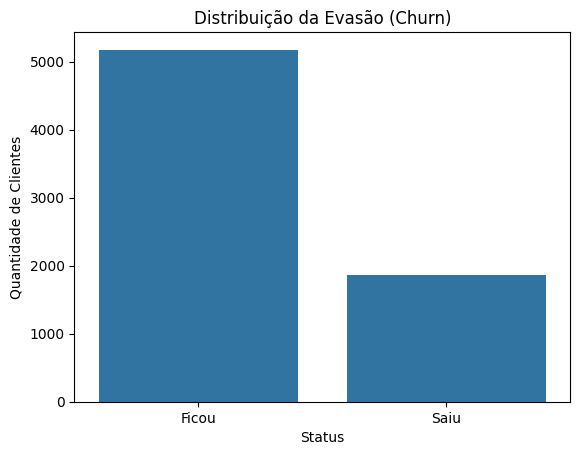

In [57]:
sns.countplot(x='Evasao', data=df)
plt.title('Distribuição da Evasão (Churn)')
plt.xticks([0, 1], ['Ficou', 'Saiu'])
plt.xlabel('Status')
plt.ylabel('Quantidade de Clientes')
plt.show()

In [58]:
churn_rate = df['Evasao'].value_counts(normalize=True)
print(churn_rate)

Evasao
0    0.73463
1    0.26537
Name: proportion, dtype: float64


EVASÃO POR CATEGORIAS

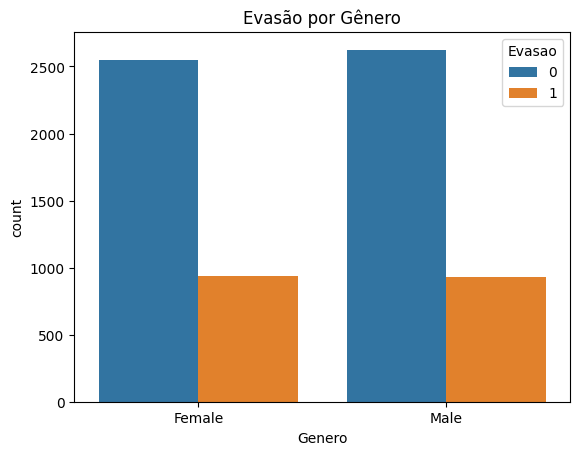

In [59]:
sns.countplot(x='Genero', hue='Evasao', data=df)
plt.title('Evasão por Gênero')
plt.xticks(rotation=0)
plt.show()

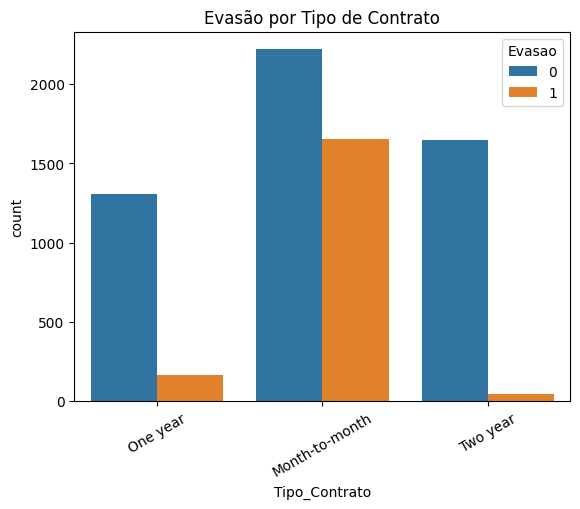

In [60]:
sns.countplot(x='Tipo_Contrato', hue='Evasao', data=df)
plt.title('Evasão por Tipo de Contrato')
plt.xticks(rotation=30)
plt.show()

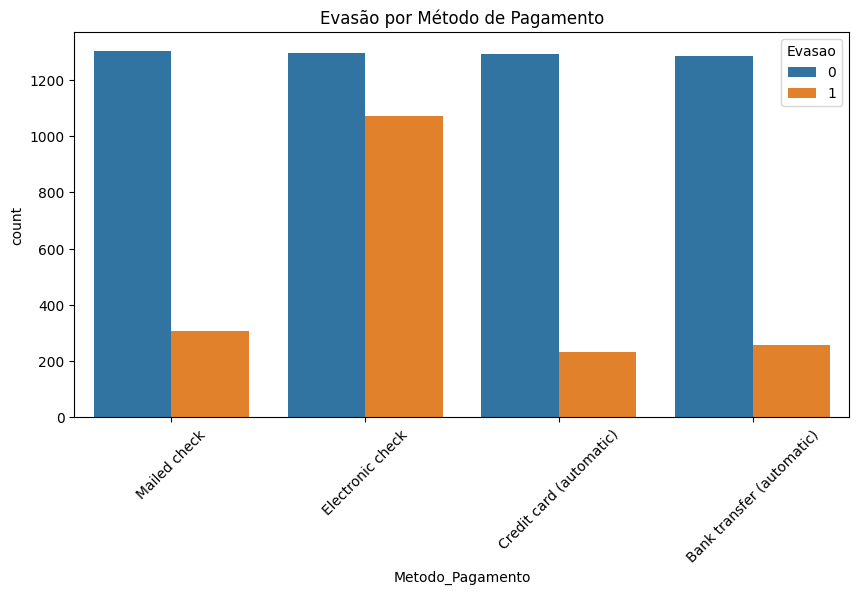

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x='Metodo_Pagamento', hue='Evasao', data=df)
plt.title('Evasão por Método de Pagamento')
plt.xticks(rotation=45)
plt.show()

EVASÃO POR VARIÁVEIS NUMÉRICAS

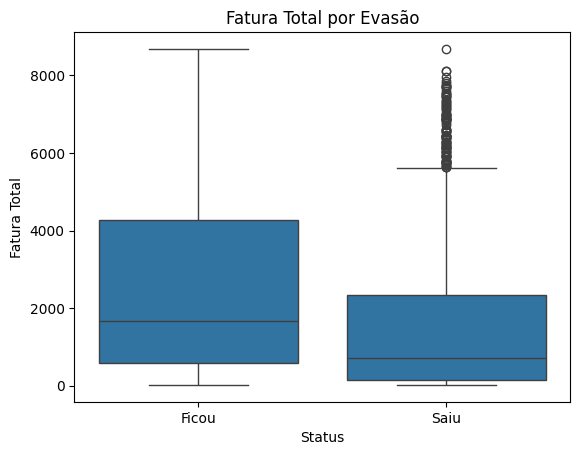

In [62]:
sns.boxplot(x='Evasao', y='Fatura_Total', data=df)
plt.title('Fatura Total por Evasão')
plt.xticks([0, 1], ['Ficou', 'Saiu'])
plt.xlabel('Status')
plt.ylabel('Fatura Total')
plt.show()

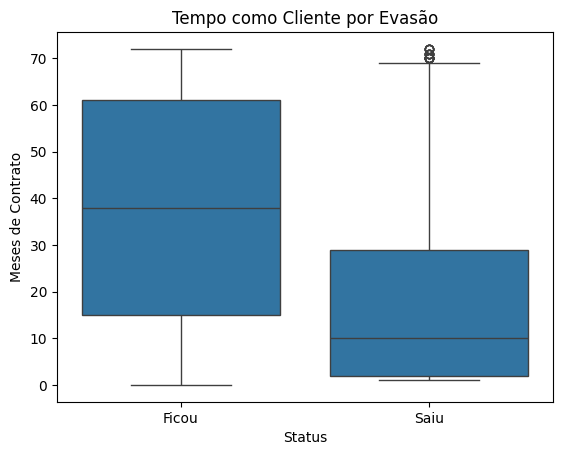

In [63]:
sns.boxplot(x='Evasao', y='Meses_Cliente', data=df)
plt.title('Tempo como Cliente por Evasão')
plt.xticks([0, 1], ['Ficou', 'Saiu'])
plt.xlabel('Status')
plt.ylabel('Meses de Contrato')
plt.show()

#📄Relatorio Final